<a href="https://colab.research.google.com/github/prakhar8583/DEEPLEARNING-PROJECT/blob/main/Covid19TensorFlowRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid 19  _tensorFlow

here We have the data set that collected date by date the total number of confirmed case for each country and each date the total number of recovered case and so
And We are gowing to actually map the pattern of the several countries over the other countries

Goal-- The goal  of this regression is basically to come up with the analysis whether the pattern in the other counrty whether that pattern actually has some similarty a or correlation with pattern of different countries or not so For Example if you sample data from let's say a few countries or several countries and then we find out the some pattern of the confirmed cases over time then wether that pattern help us finding out the growth or prediction of a new country or another counrty or unseen counrty


What we going to predict basically value of the last columnn so basically we feed the data till 13 march then base on that we are going to predict what will will be total number if cases for at 14 march

But the way we are going to do that we train our model on the of the country then we are going to test our model on unseen data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers# From tensor flow we have to import its api keras for layers
from sklearn.model_selection import train_test_split# we do't nees trin and test spilt I am going to use the validation set inside the tensor flow code
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/time_series_covid_19_confirmed.csv')

In [ ]:
df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [ ]:
# What I do I am just deleting the province/state,Country/resigon, Lat, Long ,
# I am just going to predict based on the pattern of confirmed cases
df.drop(['Province/State','Country/Region','Lat','Long'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 53 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   1/22/2020  442 non-null    int64
 1   1/23/2020  442 non-null    int64
 2   1/24/2020  442 non-null    int64
 3   1/25/2020  442 non-null    int64
 4   1/26/2020  442 non-null    int64
 5   1/27/2020  442 non-null    int64
 6   1/28/2020  442 non-null    int64
 7   1/29/2020  442 non-null    int64
 8   1/30/2020  442 non-null    int64
 9   1/31/2020  442 non-null    int64
 10  2/1/2020   442 non-null    int64
 11  2/2/2020   442 non-null    int64
 12  2/3/2020   442 non-null    int64
 13  2/4/2020   442 non-null    int64
 14  2/5/2020   442 non-null    int64
 15  2/6/2020   442 non-null    int64
 16  2/7/2020   442 non-null    int64
 17  2/8/2020   442 non-null    int64
 18  2/9/2020   442 non-null    int64
 19  2/10/2020  442 non-null    int64
 20  2/11/2020  442 non-null    int64
 21  2/12/2020  442 n

In [ ]:
# Let Copy It In New Variable
dataset=df.copy()

In [ ]:
# Let Prepare the X mean Training data set by droping the Lable Which is here is suervived
X=np.asarray(dataset.drop('3/14/2020',axis=1))
y=np.asarray(dataset['3/14/2020'])
# We make this standar_scaler and we normalize our data both the test and training  data by the same bacically object
sc=StandardScaler()
X_normailzed=sc.fit_transform(X)

In [ ]:
# I Bulit Neural network for regression type problem or model It is same as the classifiction model only difference is last layer have only one neuron or unit
# Let create the neural netork architecture
numDims=X_normailzed.shape[1]# It Basically give the number of dimesnsion
#In dnnModel You from tensorflow,you import the libaray keras then use seqencial , then sequensial you define the layer articture
dnnModel=tf.keras.Sequential(
    [
        # It is Fully connected layer architecture thats why I am using the desen here
        layers.Dense(16,activation='relu',input_shape=(numDims,)), # First hidden layer have 16 units or neuron ,activation fuction for all these unit is relu and here we give the input shape , input shape actually is total number of dimension
        # then If you want apply the batch_normalization on this layer , we call it below it
        layers.BatchNormalization(),
        # If you Want apply the dropout on this layer we can call it as well
        layers.Dropout(0.3),# This 0.3 mean 30% of the unit randomly should we drop out
        # Lets define the Second Layers as well
        layers.Dense(16,activation='elu'),# Like Here We have a diferent activation fuction elu instead Oh the relu activation fuction
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        # Now we defin the next layer with 126 neuron or unit
        layers.Dense(126,activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(160,activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(100,activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        # In Regresion in last layer only one neuron
        layers.Dense(1) # In Regresion in last layer only one neuron, It give us the real number
    ])
# Let here We are using the Adams optimiaztion algo for
optimizer=tf.keras.optimizers.RMSprop(0.0001)# 0.01 Is learing rate or step size , althought in adam step size is adaptive but that is learning rate
# after defining the architecture by the following syntax , you actually comile your model by giving different parameters
dnnModel.compile(optimizer=optimizer,loss='mse',metrics=['mae','mse'])
# different Parameters as optimizer as we define the earlyer, and loss fuction is mean sqaured error  ,
# then acuracy  matrics we are use is mean absolute error and mean squared error


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
dnnModel.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 16)             │           848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 126)            │         2,142 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 126)            │           504 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 126)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 160)            │        20,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 160)            │           640 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 100)            │        16,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,455 (161.93 KB)

 Trainable params: 40,619 (158.67 KB)

 Non-trainable params: 836 (3.27 KB)

In [ ]:
# lets Set the Epoch
EPOCHS=500
# then We call this fuction Dnn.fit , that actually will start the training for us
# Here WE SAVE OUR RESULT IN HISTORY

history=dnnModel.fit(X_normailzed,y,epochs=EPOCHS,validation_split=0.2)# We fit our model on the dataset and we also separate the validation here also as 20%


Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 6598541.5000 - mae: 319.8185 - mse: 6598541.5000 - val_loss: 14604.7402 - val_mae: 13.6412 - val_mse: 14604.7402
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 26283392.0000 - mae: 571.4105 - mse: 26283392.0000 - val_loss: 14604.7402 - val_mae: 13.6425 - val_mse: 14604.7402
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 27283066.0000 - mae: 680.7838 - mse: 27283066.0000 - val_loss: 14605.3008 - val_mae: 13.6744 - val_mse: 14605.3008
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 37294828.0000 - mae: 747.0296 - mse: 37294828.0000 - val_loss: 14605.6592 - val_mae: 13.7042 - val_mse: 14605.6592
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26078974.0000 - mae: 605.7297 - mse: 26078974.0000 - val_loss: 14606.3564 - val_mae: 13.7465 - val_mse: 14606.3564
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7446085.0000 - mae: 389.7069 - mse: 7446085.0000 - val_loss: 14606.

In [ ]:
# WE Can use this history to cheack what just happend at very end
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail(10)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
490,15124754.0,435.413239,15124754.0,14661.919922,14.197433,14661.919922,490
491,15114430.0,435.813416,15114430.0,14660.073242,14.080285,14660.073242,491
492,15107111.0,434.083649,15107111.0,14660.647461,14.067815,14660.647461,492
493,15099679.0,434.553528,15099679.0,14659.509766,13.980700,14659.509766,493
494,15111919.0,433.632477,15111919.0,14659.000977,13.891987,14659.000977,494
495,15100283.0,434.942596,15100283.0,14656.771484,13.876121,14656.771484,495
496,15101977.0,434.315460,15101977.0,14653.936523,13.718507,14653.936523,496
497,15097212.0,434.413147,15097212.0,14655.442383,13.749869,14655.442383,497
498,15093177.0,433.375885,15093177.0,14655.050781,13.724743,14655.050781,498
499,15095371.0,435.683960,15095371.0,14656.272461,13.812903,14656.272461,499


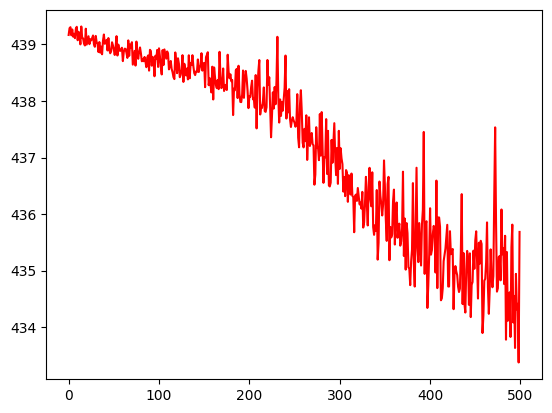

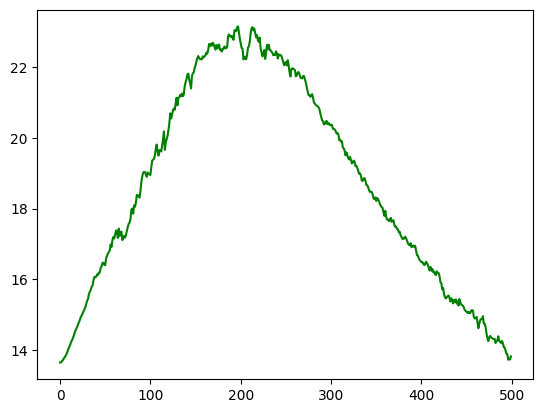

In [ ]:
# let plot with respect to epoch
plt.plot(hist['mae'],color='red')
plt.show()
plt.plot(hist['val_mae'],color='green')
plt.show()



//This What happen with the training data with adams mean Red graph  and this green graph is basically validation data with adams , you might be seeing the plot are really jittery stuff like when learning rate is 0.01 so this may become smoother and smoother if we decrease the learning rate for example learing rate to 0.001  this may become smoother and smoother ,because high learning rate have big jump they actually can be problematic beacuse around loacl minima they toggle they may overshot and they actually can increse the loss



// after some changes like activation fuction is Rmsprop , and set the learing rate is 0.0001 and use X data set insted of normailized data set because in Regression or In this case normalize data set may not working the well bacuse for normailized training data set validation mean absolut error(val_mae)  in decreasing as well as training (mae) is decresing

